In [2]:
import torchvision
import torchvision.transforms.v2

transform = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.Resize((64, 64), antialias = True),
    torchvision.transforms.v2.Grayscale(),
])

train = torchvision.datasets.ImageFolder("faces/training", transform = transform)
test = torchvision.datasets.ImageFolder("faces/testing", transform = transform)

In [3]:
import tqdm
import numpy

train_images = numpy.array([ numpy.array(item[0]) / 255. for item in tqdm.tqdm(train) ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) / 255. for item in tqdm.tqdm(test) ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

100%|██████████| 30/30 [00:00<00:00, 1864.88it/s]


((370, 64, 64), (30, 64, 64))

In [4]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = False, return_diagrams = False)
extractor = extractor.fit(train_images, "3/train")
train_features = extractor.transform(train_images, "3/train")
test_features = extractor.transform(test_images, "3/test")

Calculating inverted images
GreyscaleExtractor: processing 3/train/greyscale, do_fit = True
Got the result from ./3/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./3/train/greyscale/features.npy
Got the result from ./3/train/greyscale/features.npy
GreyscaleExtractor: processing 3/train/inverted_greyscale, do_fit = True
Got the result from ./3/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./3/train/inverted_greyscale/features.npy
Got the result from ./3/train/inverted_greyscale/features.npy
Fitting filtrations
Calculated radial centers for images of size 64x64: [12 25 38 51]x[12 25 38 51]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
FiltrationExtractor: processing 3/train/filtrations/2/HeightFiltrartion_-1_-1, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)
Got the result from ./3

In [5]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = True)
extractor = extractor.fit(train_images, "3/train")
train_diagrams = extractor.transform(train_images, "3/train")
test_diagrams = extractor.transform(test_images, "3/test")

Calculating inverted images
Got the result from ./3/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./3/train/greyscale/diagrams.npy
Got the result from ./3/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./3/train/inverted_greyscale/diagrams.npy
Fitting filtrations
Calculated radial centers for images of size 64x64: [12 25 38 51]x[12 25 38 51]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
Got the result from ./3/train/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
Got the result from ./3/train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
Got the result from ./3/train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 4/72: 2/HeightFiltrartion_-1

Dataset: processing diagrams: 100%|██████████| 74/74 [00:06<00:00, 11.17it/s]


Constructed a dataset of 370 images of shape torch.Size([1, 64, 64]) with 148 diagrams and 13497 features


Dataset: processing diagrams: 100%|██████████| 74/74 [00:00<00:00, 148.52it/s]


Constructed a dataset of 30 images of shape torch.Size([1, 64, 64]) with 148 diagrams and 13497 features
Trying SimpleTopologicalLearner - <cvtda.face_recognition.SimpleTopologicalLearner.SimpleTopologicalLearner object at 0x00000190D2F5B760>


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 4988.03it/s]


Trying DiagramsLearner - <cvtda.face_recognition.DiagramsLearner.DiagramsLearner object at 0x000001922D27B580>


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 6889.37it/s]
d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Trying NNLearner_images - <cvtda.face_recognition.NNLearner.NNLearner object at 0x000001922D27BAF0>
Input to LazyLinear: 1024
Parameters: 14063040


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 11899.94it/s]
d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Trying NNLearner_features - <cvtda.face_recognition.NNLearner.NNLearner object at 0x000001922D27B520>
Input to LazyLinear: 1024
Parameters: 16189440


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 11794.08it/s]
d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Trying NNLearner_features_images - <cvtda.face_recognition.NNLearner.NNLearner object at 0x000001922D27B6D0>
Input to LazyLinear: 2048
Parameters: 28933568


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 10694.00it/s]


Trying NNLearner_diagrams - <cvtda.face_recognition.NNLearner.NNLearner object at 0x000001922D27B6A0>
Input to LazyLinear: 1024
Parameters: 12104704


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 9090.87it/s]


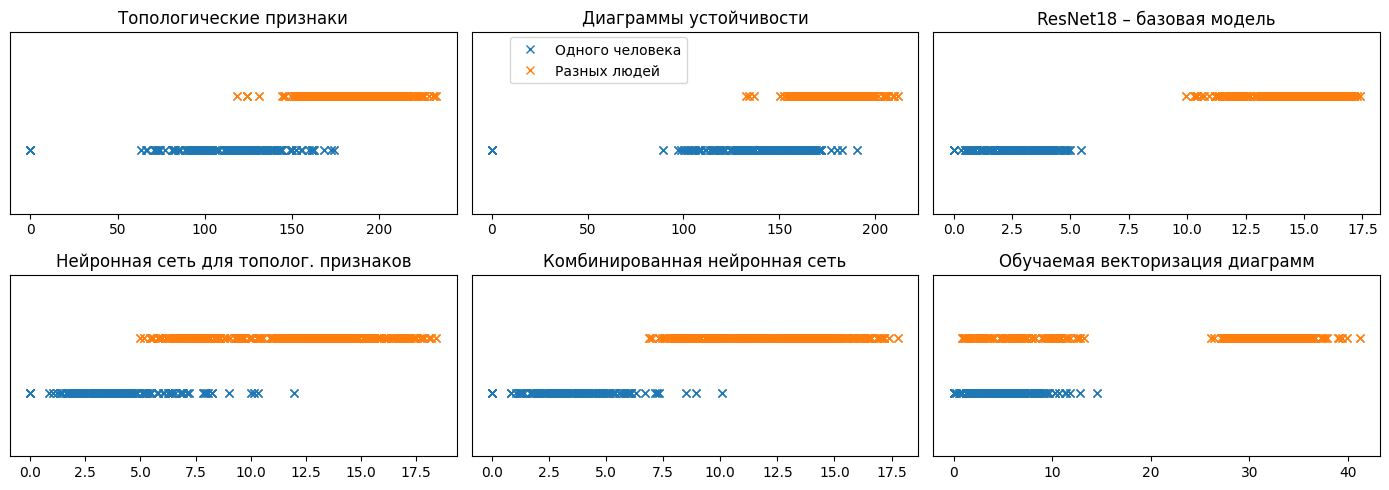

In [13]:
import cvtda.face_recognition

cvtda.face_recognition.learn(
    train_images, train_features, train_labels, train_diagrams,
    test_images, test_features, test_labels, test_diagrams,
    dump_name = "3/predictions"
)

In [15]:
import cvtda.neural_network

nn_train = cvtda.neural_network.Dataset(
    train_images, train_diagrams, train_features, train_labels
)
nn_test = cvtda.neural_network.Dataset(
    test_images, test_diagrams, test_features, test_labels
)

import cvtda.face_recognition

learner = cvtda.face_recognition.NNLearner(
    n_jobs = 1,
    skip_diagrams = True,
    skip_images = True,
    skip_features = False
).fit(nn_train, nn_test)

correct_dists, incorrect_dists = learner.estimate_quality(nn_test)

correct_keys = list(correct_dists.keys())
correct_values = numpy.array(list(correct_dists.values()))
correct_idxs = numpy.argsort(correct_values)[::-1]

incorrect_keys = list(incorrect_dists.keys())
incorrect_values = numpy.array(list(incorrect_dists.values()))
incorrect_idxs = numpy.argsort(incorrect_values)

Dataset: processing diagrams:  43%|████▎     | 32/74 [00:05<00:06,  6.36it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Dataset: processing diagrams: 100%|██████████| 74/74 [00:14<00:00,  5.08it/s]


Constructed a dataset of 370 images of shape torch.Size([1, 64, 64]) with 148 diagrams and 13497 features


Dataset: processing diagrams: 100%|██████████| 74/74 [00:00<00:00, 1996.66it/s]
d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Constructed a dataset of 30 images of shape torch.Size([1, 64, 64]) with 148 diagrams and 13497 features
Input to LazyLinear: 1024
Parameters: 16189440


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 9794.97it/s]


4 1 11.961417198181152
8 4 10.313674926757812
1 0 10.16454029083252
9 4 10.010520935058594
7 1 8.995476722717285
---------
10 5 4.955209255218506
13 5 5.176359176635742
14 5 5.421143531799316
11 5 5.525327205657959
18 5 5.547233581542969


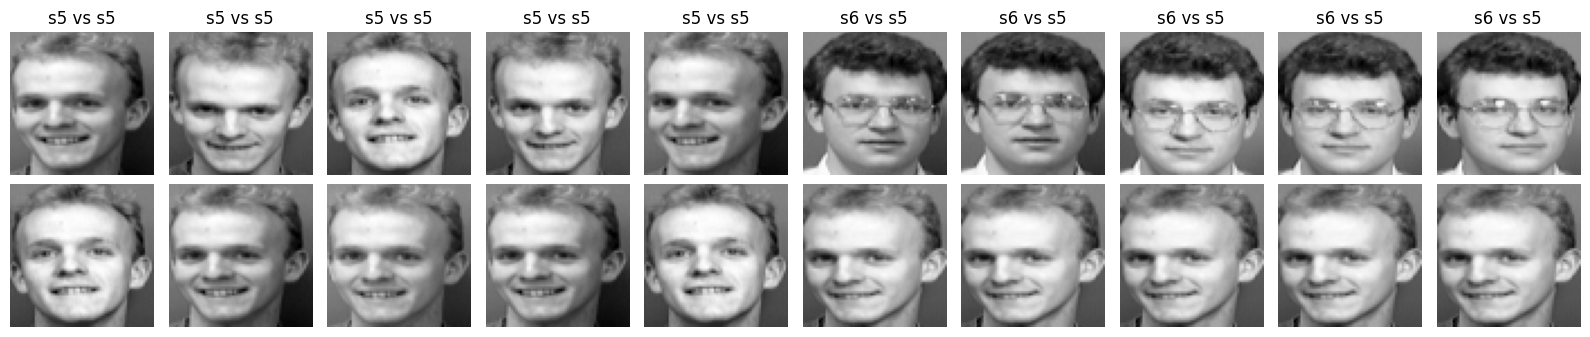

In [21]:
import matplotlib.pyplot as plt


figure, axes = plt.subplots(2, 10, figsize = (16, 3.5))

cou, i = 0, 0
while cou < 5:
    first, second = correct_keys[correct_idxs[i]]
    i += 1
    if first < second:
        continue
    print(first, second, correct_values[correct_idxs[i - 1]])
    axes[0][cou].set_title(f"{test.classes[test_labels[first]]} vs {test.classes[test_labels[second]]}")
    axes[0][cou].imshow(test_images[first], cmap = "gray")
    axes[1][cou].imshow(test_images[second], cmap = "gray")
    axes[0][cou].axis(False)
    axes[1][cou].axis(False)
    cou += 1

print('---------')

i = 0
while cou < 10:
    first, second = incorrect_keys[incorrect_idxs[i]]
    i += 1
    if first < second:
        continue
    print(first, second, incorrect_values[incorrect_idxs[i - 1]])
    axes[0][cou].set_title(f"{test.classes[test_labels[first]]} vs {test.classes[test_labels[second]]}")
    axes[0][cou].imshow(test_images[first], cmap = "gray")
    axes[1][cou].imshow(test_images[second], cmap = "gray")
    axes[0][cou].axis(False)
    axes[1][cou].axis(False)
    cou += 1    


figure.tight_layout()

plt.savefig("3/predictions/error_examples.svg")
plt.savefig("3/predictions/error_examples.png")